In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras # deeplearning
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop #optimizer for CNN model
import matplotlib.pyplot as plt #plotting data
import os

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
print('Training Data avaiable is')
print(int(len(os.listdir('../input/skin-cancer-malignant-vs-benign/data/train/benign')))+int(len(os.listdir('../input/skin-cancer-malignant-vs-benign/data/train/malignant'))))

print('Testing Data avaiable is')
print(int(len(os.listdir('../input/skin-cancer-malignant-vs-benign/data/test/benign')))+int(len(os.listdir('../input/skin-cancer-malignant-vs-benign/data/test/malignant'))))




Training Data avaiable is
2637
Testing Data avaiable on benign is
360
Testing Data avaiable on malignant is
300


In [2]:
#Model for Convolutional Neural Network with pooling

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(228,228,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 226, 226, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [3]:
#Compile the model

model.compile(
    loss='binary_crossentropy',
    optimizer = RMSprop(lr=0.0001),
    metrics=['acc']
)

In [4]:
#Using Image Generator 

path_training = '../input/skin-cancer-malignant-vs-benign/data/train/'
path_validation = '../input/skin-cancer-malignant-vs-benign/data/test/'
train_image_data_gen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest' 
)

train_image_generator=train_image_data_gen.flow_from_directory(
    path_training ,
    batch_size = 10,
    class_mode = 'binary' ,
    target_size = (228,228) ,
)

validation_image_data_gen=ImageDataGenerator(
    rescale=1./255
)
validation_image_generator= validation_image_data_gen.flow_from_directory(
    path_validation ,
    class_mode = 'binary' ,
    target_size = (228,228) ,
    batch_size = 10
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [5]:
#Actual Fitting of the data to the model

data = model.fit_generator(
    train_image_generator,
    validation_data=validation_image_generator,
    epochs=10,
    verbose=2
)

Epoch 1/10
264/264 - 46s - loss: 0.5411 - acc: 0.7205 - val_loss: 0.4338 - val_acc: 0.8167
Epoch 2/10
264/264 - 40s - loss: 0.4660 - acc: 0.7710 - val_loss: 0.5133 - val_acc: 0.7500
Epoch 3/10
264/264 - 40s - loss: 0.4458 - acc: 0.7804 - val_loss: 0.3859 - val_acc: 0.8152
Epoch 4/10
264/264 - 40s - loss: 0.4361 - acc: 0.7880 - val_loss: 0.3791 - val_acc: 0.8182
Epoch 5/10
264/264 - 41s - loss: 0.4243 - acc: 0.7971 - val_loss: 0.3870 - val_acc: 0.7955
Epoch 6/10
264/264 - 41s - loss: 0.4194 - acc: 0.8013 - val_loss: 0.3676 - val_acc: 0.8121
Epoch 7/10
264/264 - 40s - loss: 0.4089 - acc: 0.8085 - val_loss: 0.4998 - val_acc: 0.7939
Epoch 8/10
264/264 - 41s - loss: 0.4083 - acc: 0.8070 - val_loss: 0.3741 - val_acc: 0.8106
Epoch 9/10
264/264 - 41s - loss: 0.4079 - acc: 0.8104 - val_loss: 0.3609 - val_acc: 0.8212
Epoch 10/10
264/264 - 41s - loss: 0.3994 - acc: 0.8134 - val_loss: 0.3940 - val_acc: 0.8045


<Figure size 432x288 with 0 Axes>

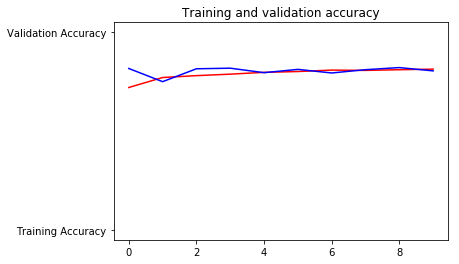

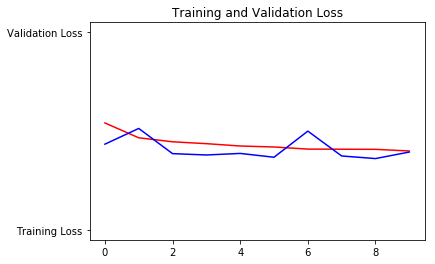

<Figure size 432x288 with 0 Axes>

In [6]:
#Plotting the data of Accuracy and Loss using Matplotlib

%matplotlib inline

acc=data.history['acc']
val_acc=data.history['val_acc']
loss=data.history['loss']
val_loss=data.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss ,'r','Training Loss')
plt.plot(epochs, val_loss, 'b','Validation Loss')
plt.title('Training and Validation Loss')
plt.figure()